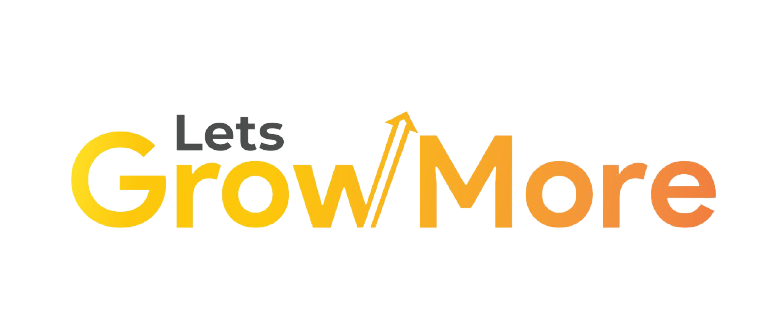

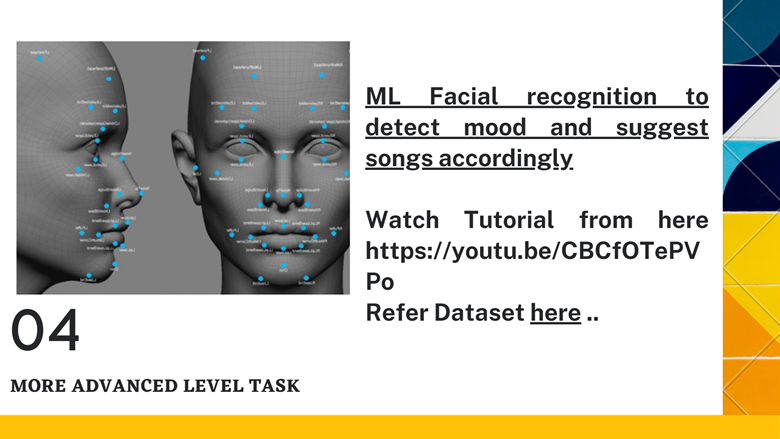

<p style = "font-size:16px"><b> BY: Lakshmi Sindhu.P </b></p>

# Introduction:
## Problem Statement:
ML Facial Recognition to detect mood and suggest songs accordingly.

* Face recognition technology has widely attractedattention due to its enormous application value and marketpotential. 
* It is being implemented in various fields like securitysystem, digital video processing, and many such technologicaladvances. * Additionally, music is the form of art, which isknown to have a greater connection with a person’s emotion. It has got a unique ability to lift up one’s mood. 

The human face is one of the most important parts of the anatomical body. It plays a great role in knowing the emotional status or the mood of the person. The mood of the person can be predicted, up to a certain accuracy, with the help of certain features visible on the face. With today’s technologies, extracting or filtering the inputs can be done directly with the help of a webcam or an external device along with a few softwares. 

This input can further be used for many applications and further studies. These technologies can be used to extract the moods of the user and those moods can be stored in a database.
Relatively, this project focuses on building an efficient music recommendationsystem which determines the emotion of user using
FacialRecognition techniques.

# Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

# Importing Datasets:

In [2]:
train_dir = 'train\\'
test_dir = 'test\\'

row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


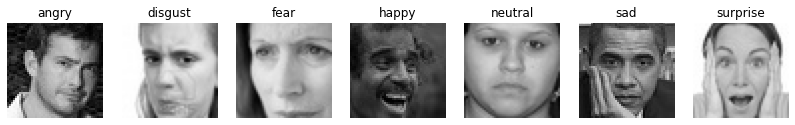

In [3]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_dir):
    img = load_img((train_dir + expression +'/'+ os.listdir(train_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

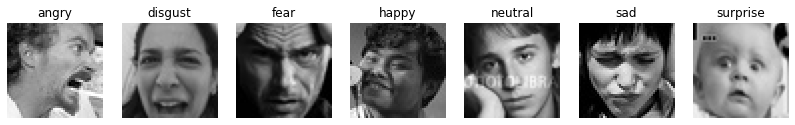

In [4]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(test_dir):
    img = load_img((test_dir + expression +'/'+ os.listdir(test_dir + expression)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

# Plotting number of images in Training Dataset:

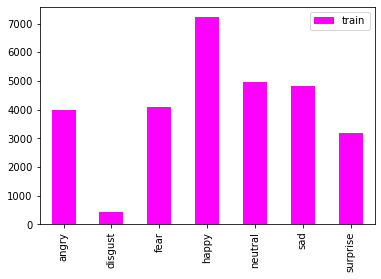

In [5]:
train_count.transpose().plot(kind='bar',color='magenta')
plt.show()

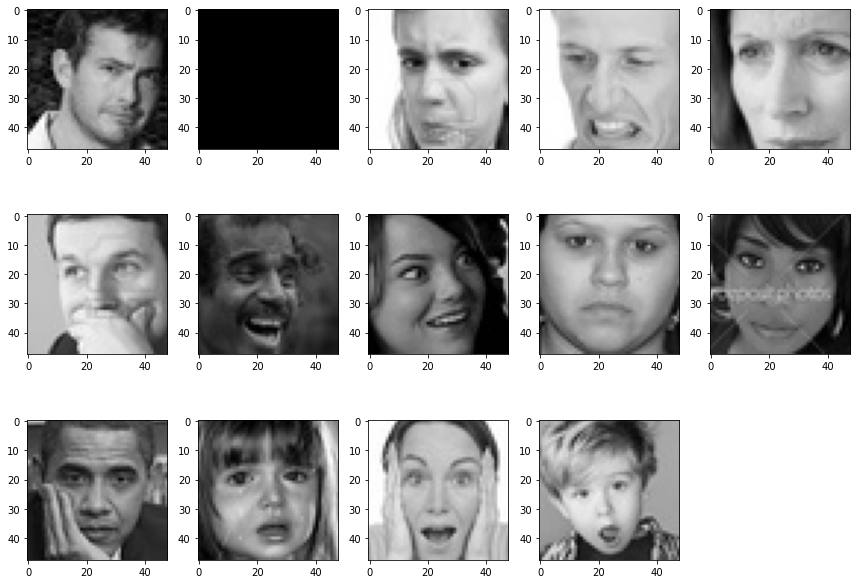

In [6]:
img_size = 48
plt.figure(0, figsize=(12,20))
index = 0
for link in os.listdir("train\\"):
    for i in range(1,3):
        index += 1
        plt.subplot(7,5,index)
        img = load_img("train\\" + link + "/" +os.listdir("train\\" + link)[i], target_size=(img_size, img_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()

# Plotting number of images in Test Dataset:

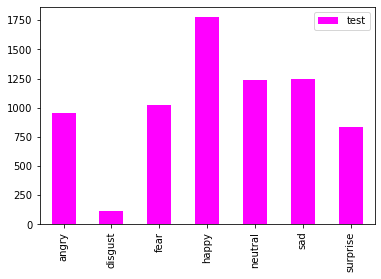

In [7]:
test_count.transpose().plot(kind='bar',color='magenta')
plt.show()

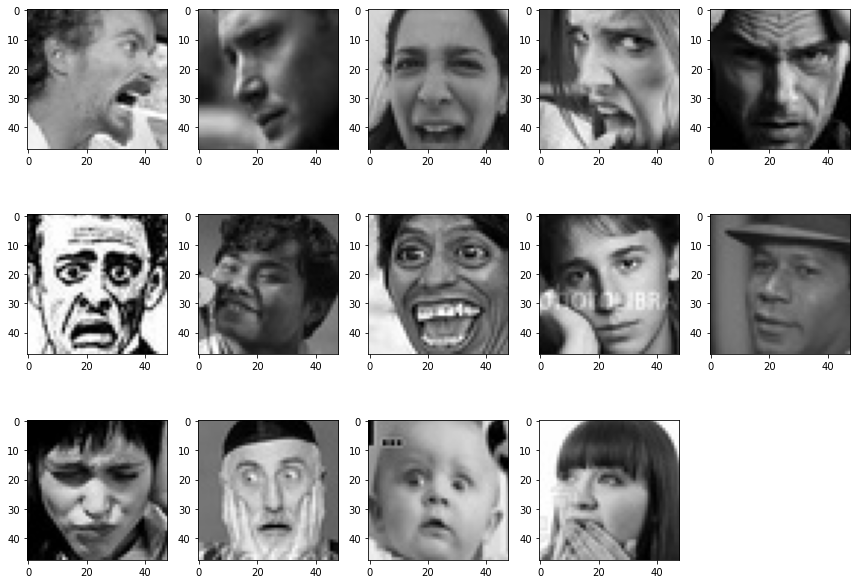

In [8]:
img_size = 48
plt.figure(0, figsize=(12,20))
index = 0
for link in os.listdir("test\\"):
    for i in range(1,3):
        index += 1
        plt.subplot(7,5,index)
        img = load_img("test\\" + link + "/" +os.listdir("test\\" + link)[i], target_size=(img_size, img_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()

# Creating training and test datasets:

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# Model Creation:
## Defining the model:

In [11]:
def get_model(input_size, classes=7):
     #Initialising the CNN
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [12]:
fernet = get_model((row,col,1), classes)
fernet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 256)       2

D:\Applications\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


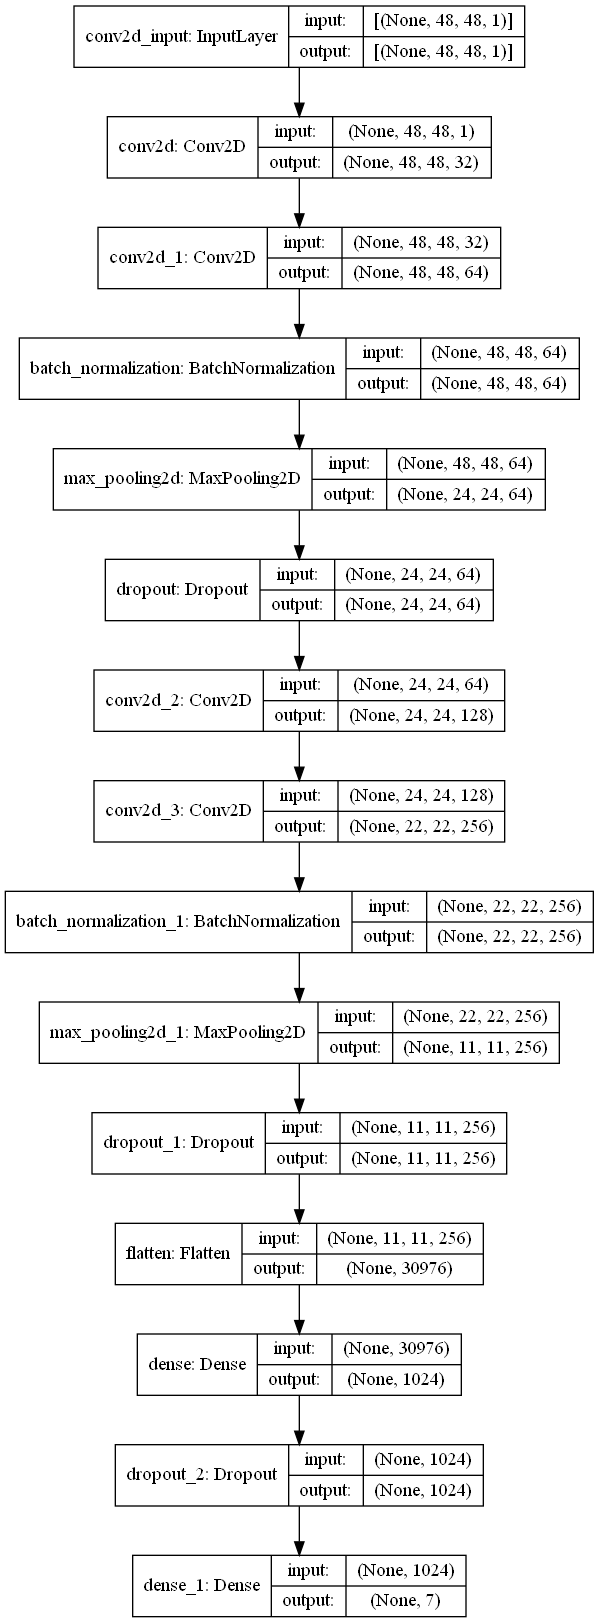

In [13]:
plot_model(fernet, to_file='fernet.png', show_shapes=True, show_layer_names=True)

## Callback Function:

In [14]:
chk_path = 'ferNet.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

## Training the Model:

In [15]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = fernet.fit(x=training_set,
                 validation_data=test_set,
                 epochs=20,
                 callbacks=callbacks,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/20
448/448 [==============================] - 718s 2s/step - loss: 4.2967 - accuracy: 0.2896 - val_loss: 5.4696 - val_accuracy: 0.1836

Epoch 00001: val_loss improved from inf to 5.46963, saving model to ferNet.h5
Epoch 2/20
448/448 [==============================] - 465s 1s/step - loss: 3.4587 - accuracy: 0.3545 - val_loss: 3.0790 - val_accuracy: 0.4109

Epoch 00002: val_loss improved from 5.46963 to 3.07901, saving model to ferNet.h5
Epoch 3/20
448/448 [==============================] - 467s 1s/step - loss: 2.9123 - accuracy: 0.3885 - val_loss: 2.6147 - val_accuracy: 0.4393

Epoch 00003: val_loss improved from 3.07901 to 2.61465, saving model to ferNet.h5
Epoch 4/20
448/448 [==============================] - 469s 1s/step - loss: 2.4918 - accuracy: 0.4161 - val_loss: 2.2789 - val_accuracy: 0.4369

Epoch 00004: val_loss improved from 2.61465 to 2.27888, saving model to ferNet.h5
Epoch 5/20
448/448 [==============================] - 465s 1s/step - loss: 2.1750 - accuracy: 0.4353

## Model Loss and Model Accuracy plots:

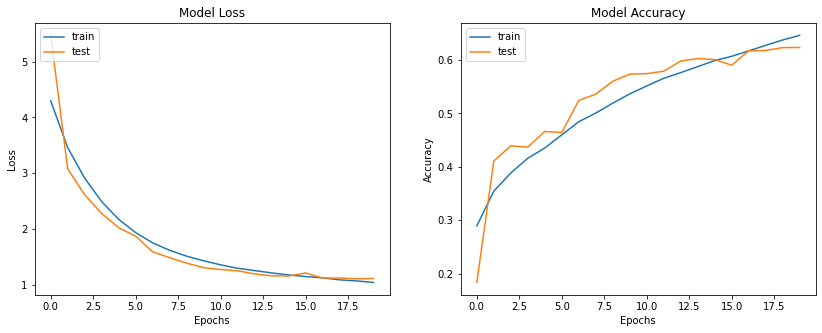

In [16]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model Evaluation:

In [17]:
train_loss, train_accu = fernet.evaluate(training_set)
test_loss, test_accu = fernet.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

113/113 [==============================] - 20s 179ms/step - loss: 1.1153 - accuracy: 0.6240
final train accuracy = 69.92 , validation accuracy = 62.40


In [18]:
fernet.save_weights('fernet_bestweight.h5')

# Confusion Matrix and Classification on training dataset:

Confusion Matrix
[[ 538   53  520 1125  749  501  509]
 [  58    3   54  116   91   59   55]
 [ 583   35  505 1115  792  530  537]
 [ 949   81  872 2060 1383  980  890]
 [ 654   48  592 1480  953  622  616]
 [ 604   48  573 1352  975  652  626]
 [ 378   29  436  886  617  404  421]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.13      0.14      3995
     disgust       0.01      0.01      0.01       436
        fear       0.14      0.12      0.13      4097
       happy       0.25      0.29      0.27      7215
     neutral       0.17      0.19      0.18      4965
         sad       0.17      0.13      0.15      4830
    surprise       0.12      0.13      0.12      3171

    accuracy                           0.18     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.18      0.18      0.18     28709



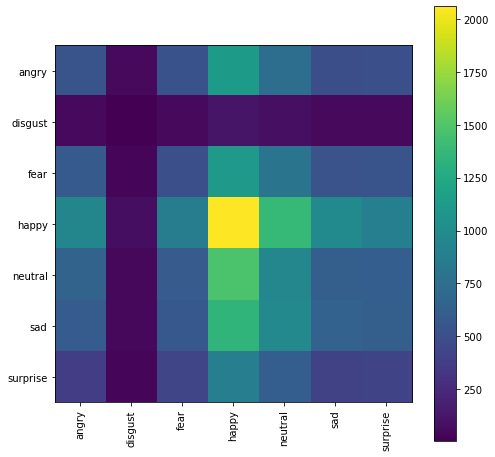

In [19]:
y_pred = fernet.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

#Plotting
plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

# Confusion Matrix and Classification on test dataset:

Confusion Matrix
[[152   8 114 257 200 113 114]
 [ 14   1  13  31  24  12  16]
 [175   6 123 268 189 118 145]
 [288  14 217 486 343 212 214]
 [180   7 135 349 236 157 169]
 [178  10 136 337 244 149 193]
 [136   8  80 214 178  95 120]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.16      0.15       958
     disgust       0.02      0.01      0.01       111
        fear       0.15      0.12      0.13      1024
       happy       0.25      0.27      0.26      1774
     neutral       0.17      0.19      0.18      1233
         sad       0.17      0.12      0.14      1247
    surprise       0.12      0.14      0.13       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.14      7178
weighted avg       0.17      0.18      0.17      7178



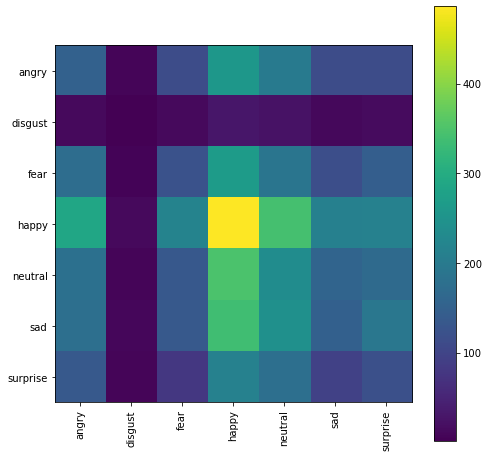

In [20]:
y_pred = fernet.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#Confusion Matrix
#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

#Plotting
plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

<p style = "font-size:22px"><b><center>THANK YOU</center></b></p>